# Nonlinearity

In [2]:
pip install numpy matplotlib pandas scikit-learn seaborn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## California Housing Dataset
###  Outliers

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Split
from sklearn.model_selection import train_test_split
housing_train_data, housing_test_data, \
housing_train_target, housing_test_target = \
train_test_split(housing.data, housing.target, test_size=0.2, random_state=12)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_train_scaled_data = scaler.fit_transform(housing_train_data)
housing_test_scaled_data = scaler.transform(housing_test_data)

# Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(housing_train_scaled_data, housing_train_target)

LinearRegression()

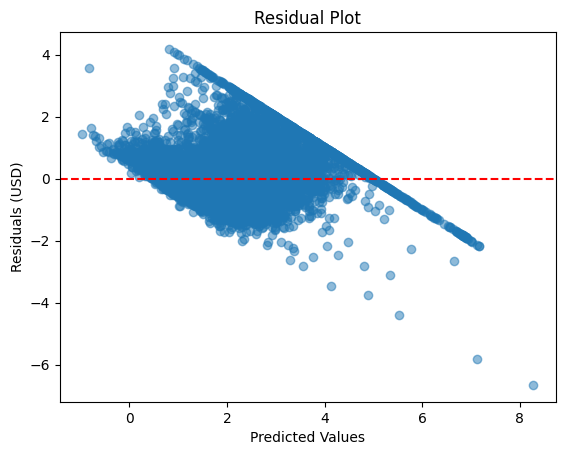

Mean Absolute Error: $53176
R2: 0.62


In [4]:
# Residuals
predictions = linear_regression.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (USD)")
plt.title("Residual Plot")
plt.show()

# Metrics
test_predictions = linear_regression.predict(housing_test_scaled_data)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(housing_test_target, test_predictions )*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_test_target, test_predictions ))

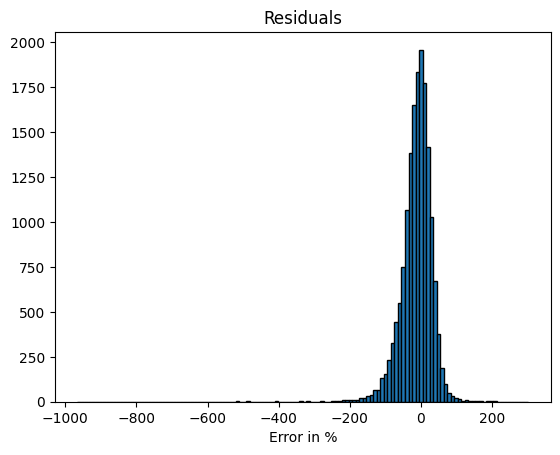

In [5]:
#res_scaler = StandardScaler()
#plt.hist(res_scaler.fit_transform(residuals.reshape(-1, 1)), edgecolor='black', bins=int(np.sqrt(len(residuals))))
#plt.title("Standardized Residuals")

plt.hist(residuals/housing_train_target*100, edgecolor='black', bins=int(np.sqrt(len(residuals))))
plt.title("Residuals")
plt.xlabel("Error in %")
plt.show()

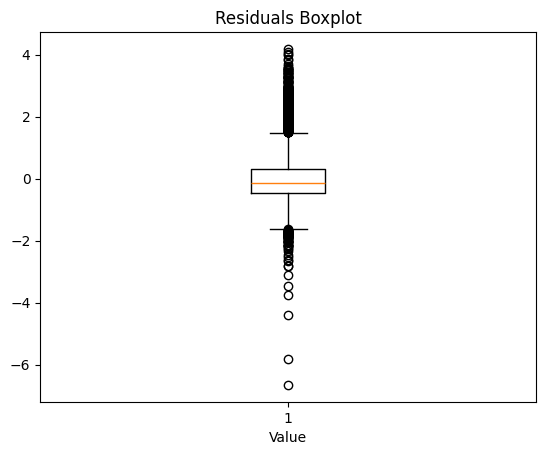

In [6]:
plt.boxplot(residuals)
plt.title("Residuals Boxplot")
plt.xlabel("Value")
plt.show()

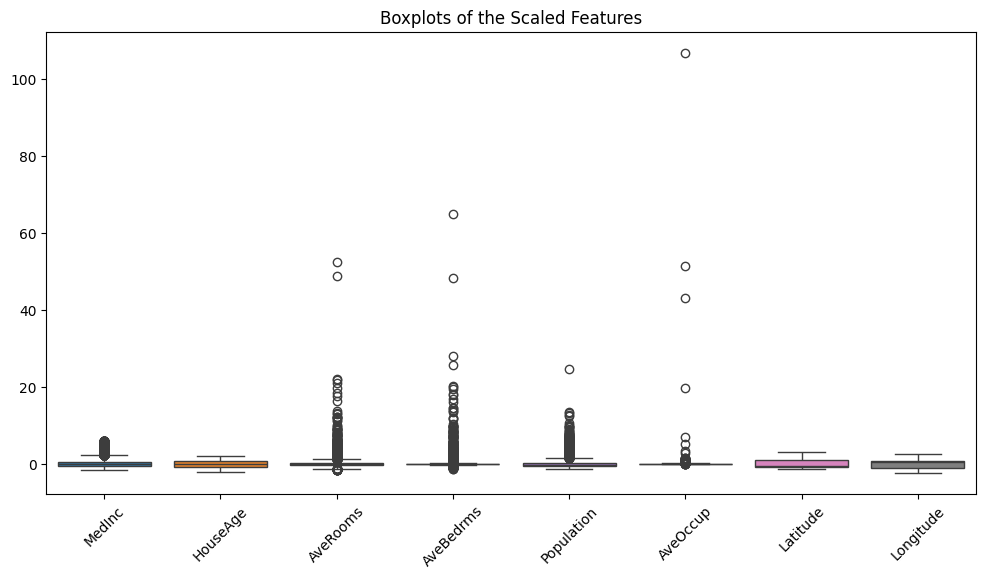

In [7]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(housing_train_scaled_data, columns=housing.feature_names)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots of the Scaled Features')
plt.show()

Removing Outliers

In [8]:
from scipy.stats import zscore

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

#Z-score of ±3 is an outlier. In a normal distribution, 99.7% of data falls within 3 standard deviations of the mean.
z_scores = np.abs(df.apply(zscore))

# Drop rows where any column has a Z-score > 3
df_clean = df[(z_scores < 3).all(axis=1)]

x_clean = df_clean[housing.feature_names]
y_clean = df_clean['Target']

len_before, len_after = len(housing.target), len(y_clean)
print("Removed " + str(len_before - len_after) + " outliers, " + str(round((len_before - len_after)/len_before*100, 2)) + " %")

Removed 846 outliers, 4.1 %


In [9]:
# Split
from sklearn.model_selection import train_test_split
housing_train_data, housing_test_data, \
housing_train_target, housing_test_target = \
train_test_split(x_clean, y_clean, test_size=0.2, random_state=12)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_train_scaled_data = scaler.fit_transform(housing_train_data)
housing_test_scaled_data = scaler.transform(housing_test_data)

# Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(housing_train_scaled_data, housing_train_target)

LinearRegression()

In [10]:
# Residuals
predictions = linear_regression.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

# Metrics
test_predictions = linear_regression.predict(housing_test_scaled_data)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(housing_test_target, test_predictions )*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_test_target, test_predictions ))

Mean Absolute Error: $49071
R2: 0.62


## Student Task 1

As an alternative to dropping outliers, apply [winsorization](https://en.wikipedia.org/wiki/Winsorizing) to the data, limiting the outliers to a maximum or minimum value. Check the new residuals, MAE and R2.

Mean Absolute Error: $49678
R2: 0.67


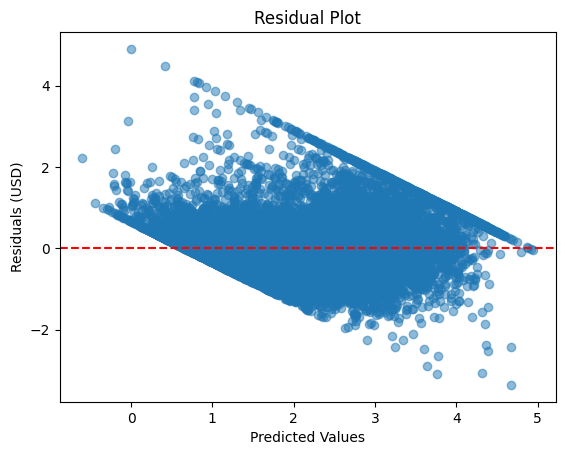

In [11]:
from scipy.stats import mstats

# Apply winsorization to the data
bottom_percent, top_percent = 0.05, 0.05
df_winsorized = df.apply(lambda x: mstats.winsorize(x, limits=[bottom_percent, top_percent]))

# Split the data
x_winsorized = df_winsorized[housing.feature_names]
y_winsorized = df_winsorized['Target']
housing_train_data, housing_test_data, housing_train_target, housing_test_target = train_test_split(x_winsorized, y_winsorized, test_size=0.2, random_state=12)

# Scale the data
housing_train_scaled_data = scaler.fit_transform(housing_train_data)
housing_test_scaled_data = scaler.transform(housing_test_data)

# Fit the linear regression model
linear_regression.fit(housing_train_scaled_data, housing_train_target)

# Calculate residuals
predictions = linear_regression.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

# Calculate metrics
test_predictions = linear_regression.predict(housing_test_scaled_data)
mae = mean_absolute_error(housing_test_target, test_predictions) * 100000
r2 = r2_score(housing_test_target, test_predictions)

# Print metrics
print("Mean Absolute Error: $%d" % mae)
print('R2: %.2f' % r2)

# Plot residuals
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (USD)")
plt.title("Residual Plot")
plt.show()

## Polynomial Features

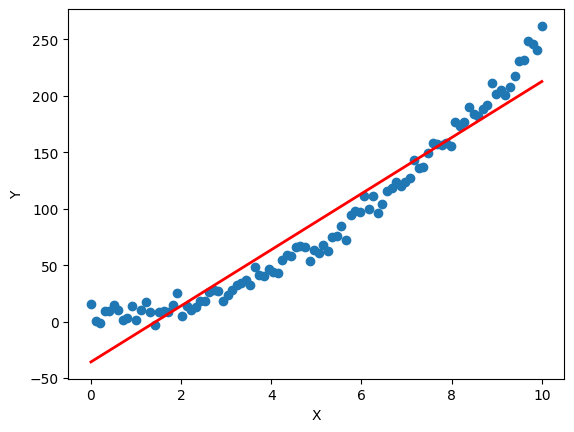

In [12]:
num_points = 100
a = 2.5
b = 5

x = np.linspace(0, 10, num_points)
y = a * x**2 + b + np.random.normal(0, 6.0, num_points)

linear_regression = LinearRegression()
x_ = x.reshape(-1, 1)
linear_regression.fit(x_, y)
y_pred = linear_regression.predict(x_)

plt.scatter(x, y)
plt.xlabel("X"), plt.ylabel("Y")
plt.plot(x, y_pred, color='red', label='Linear Fit', linewidth=2)
plt.show()

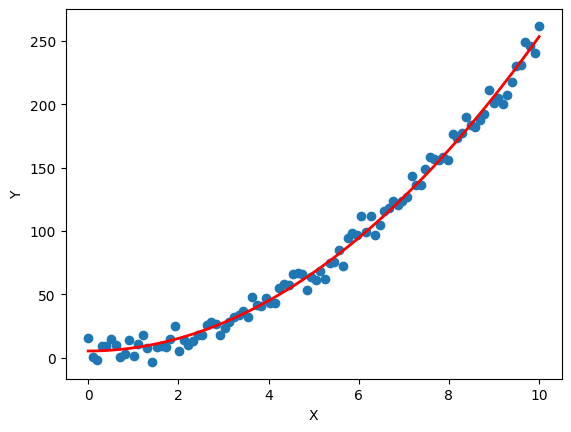

In [14]:
x_ = (x**2).reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(x_, y)
y_pred = linear_regression.predict(x_)

plt.scatter(x, y)
plt.xlabel("X"), plt.ylabel("Y")
plt.plot(x, y_pred, color='red', label='Linear Fit', linewidth=2)
plt.show()

In [16]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Residuals
predictions = linear_regression.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

# LOWESS (locally weighted scatterplot smoothing)
# For each point, it fits a weighted linear regression using nearby points, where closer points have more influence (higher weight).
lowess_fit = lowess(residuals, predictions, frac=0.3)
sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
plt.plot(lowess_fit[:, 0], lowess_fit[:, 1], color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

ValueError: X has 8 features, but LinearRegression is expecting 1 features as input.

Degree 0:

$x_1 + x_2 + x_3$

Degree 2:

$x_1 + x_2 + x_3 + x_1x_2 + x_2+x_3 + x_1x_3 + x_1^2 + x_2^2 + x_3^2$

In [17]:
from sklearn.preprocessing import PolynomialFeatures

pt = PolynomialFeatures(2, )
housing_data_poly = pt.fit_transform(housing.data)

print("Old number of features: " + str(len(housing.feature_names)))
print("New number of features: " + str(housing_data_poly.shape[1]))

Old number of features: 8
New number of features: 45


In [18]:
# Split
from sklearn.model_selection import train_test_split
housing_train_data, housing_test_data, \
housing_train_target, housing_test_target = \
train_test_split(housing_data_poly, housing.target, test_size=0.2, random_state=12)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_train_scaled_data = scaler.fit_transform(housing_train_data)
housing_test_scaled_data = scaler.transform(housing_test_data)

# Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(housing_train_scaled_data, housing_train_target)

LinearRegression()

In [19]:
# Residuals
predictions = linear_regression.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

# Train Metrics
from sklearn.metrics import mean_absolute_error
print(" Train:")
mae = mean_absolute_error(housing_train_target, predictions)*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_train_target, predictions))

# Test Metrics
print("\n Test:")
test_predictions = linear_regression.predict(housing_test_scaled_data)
mae = mean_absolute_error(housing_test_target, test_predictions )*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_test_target, test_predictions ))

 Train:
Mean Absolute Error: $42512
R2: 0.73

 Test:
Mean Absolute Error: $43126
R2: 0.74


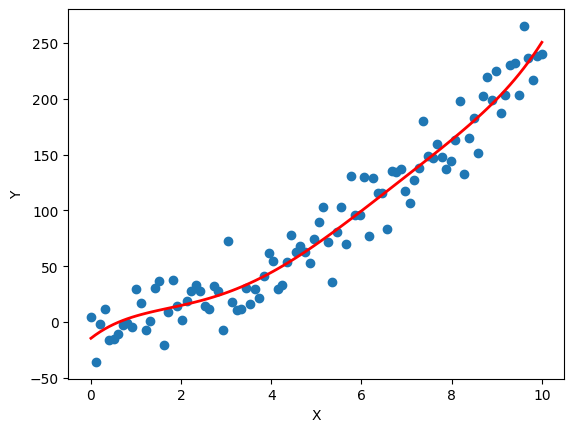

In [20]:
num_points = 100
a = 2.5
b = 5

x = np.linspace(0, 10, num_points)
y = a * x**2 + b + np.random.normal(0, 20.0, num_points)

linear_regression = LinearRegression()
x_ = x.reshape(-1, 1)

pt = PolynomialFeatures(5, )
x_  = pt.fit_transform(x_ )
linear_regression.fit(x_, y)
y_pred = linear_regression.predict(x_)

plt.scatter(x, y)
plt.xlabel("X"), plt.ylabel("Y")
plt.plot(x, y_pred, color='red', label='Linear Fit', linewidth=2)
plt.show()

## Student Task 2
### Feature ranking with recursive feature elimination with [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

Using windsorized data, generate polynomial features and then select some number of features using RFE. <br>
Parameters to experiment with: widsorization limits, polynomial degree, number of features to select.

In [ ]:
from sklearn.feature_selection import RFE

sel_ = RFE(estimator=LinearRegression(), n_features_to_select=15)
sel_.fit(housing_data_poly, housing_train_target)

## Neural Networks

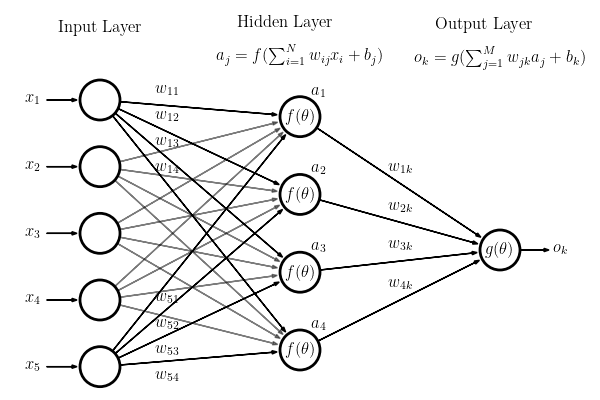

[Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) <br>
Single hidden layer and a finite number of neurons can approximate any continuous function on a subset of real numbers, given a non-linear activation function.

In [ ]:
# Split
from sklearn.model_selection import train_test_split
housing_train_data, housing_test_data, \
housing_train_target, housing_test_target = \
train_test_split(housing.data, housing.target, test_size=0.2, random_state=12)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_train_scaled_data = scaler.fit_transform(housing_train_data)
housing_test_scaled_data = scaler.transform(housing_test_data)

In [ ]:
from sklearn.neural_network import MLPRegressor
neural_network = MLPRegressor(hidden_layer_sizes=(15,5,), activation='logistic', solver="sgd", \
                              batch_size=20, shuffle=True, alpha=1e-4, verbose=True, \
                              max_iter=100, tol=1e-7, random_state=1)

neural_network.fit(housing_train_scaled_data, housing_train_target)

In [ ]:
# Residuals
predictions = neural_network.predict(housing_train_scaled_data)
residuals = housing_train_target - predictions

# Train Metrics
from sklearn.metrics import mean_absolute_error
print(" Train:")
mae = mean_absolute_error(housing_train_target, predictions)*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_train_target, predictions))

# Test Metrics
print("\n Test:")
test_predictions = neural_network.predict(housing_test_scaled_data)
mae = mean_absolute_error(housing_test_target, test_predictions )*100000
print("Mean Absolute Error: $%d" % mae)
from sklearn.metrics import r2_score
print('R2: %.2f' % r2_score(housing_test_target, test_predictions ))

In [ ]:
lowess_fit = lowess(residuals, predictions, frac=0.3)
sns.scatterplot(x=predictions, y=residuals, alpha=0.6)
plt.plot(lowess_fit[:, 0], lowess_fit[:, 1], color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Student Task 3
Use a feed forward neural network for the classification task on the breast cancer dataset. Compare the accuracy, F1 of the neural network to the accuracy and F1 of the previously used logistic regression model. Experiment with the model parameters.


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = datasets.load_breast_cancer()

from sklearn.neural_network import MLPClassifier
neural_network = MLPClassifier(hidden_layer_sizes=(,), activation="", solver="sgd", \
                              batch_size=, shuffle=True, alpha=, verbose=True, \
                              max_iter=1000, tol=1e-7, random_state=)